In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob

In [5]:
#matplotlib notebook
plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rcParams['text.usetex'] = False
#plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [6]:
files=glob("//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/final/*.out")#glob("//smb.uni-oldenburg.de/hpc_data/thesis/data/logs/tf/*.out")
#files=glob("models/wind-20220228-230210/*.txt")
files

['//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/final\\log_tensorflow.cfdg001.24644301.out',
 '//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/final\\log_tensorflow.cfdg001.24645722.out',
 '//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/final\\log_tensorflow.cfdg001.24645765.out',
 '//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/final\\log_tensorflow.cfdg002.24641716.out',
 '//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/final\\log_tensorflow.cfdg002.24647023.out',
 '//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/final\\log_tensorflow.cfdg002.24647308.out',
 '//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/final\\log_tensorflow.cfdg002.24647386.out',
 '//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/final\\log_tensorflow.cfdg002.24647642.out',
 '//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/final\\log_tensorflow.cfdg002.24647834.out',
 '//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/final\\log_tensorflow.cfdg003.24629762.out']

In [7]:
WGANfiles=glob("//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/WGAN/*.out")#glob("//smb.uni-oldenburg.de/hpc_data/thesis/data/logs/tf/*.out")
#files=glob("models/wind-20220228-230210/*.txt")
WGANfiles

['//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/WGAN\\log_tensorflow.cfdg001.24597724.out',
 '//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/WGAN\\log_tensorflow.cfdg001.24597750.out',
 '//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/WGAN\\log_tensorflow.cfdg001.24597770.out',
 '//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/WGAN\\log_tensorflow.cfdg001.24597777.out',
 '//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/WGAN\\log_tensorflow.cfdg001.24605468.out',
 '//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/WGAN\\log_tensorflow.cfdg001.24655437.out',
 '//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/WGAN\\log_tensorflow.cfdg001.24678810.out',
 '//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/WGAN\\log_tensorflow.cfdg001.24678949.out',
 '//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/WGAN\\log_tensorflow.cfdg001.24683640.out',
 '//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/WGAN\\log_tensorflow.cfdg001.24692256.out',
 '//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/WGAN\\log_

In [8]:
def get_loss_from_log(file,cnn=1, WGAN=1,epoch_limit=None,line_off=4):
    file = open(file, 'r')
    Lines = file.readlines()
    file.close()
    tl_e=[] #epoch loss
    vl_e=[] #epoch loss
    g_tl_e=[] #generator training loss per epoch
    d_tl_e=[] #discriminator training loss per epoch
    g_vl_e=[] #generator validation loss per epoch
    d_vl_e=[] #discriminator validation loss per epoch
    g_tcl_e=[] #WGAN generator content loss per epoch
    tcl_e=[] #WGAN training content loss per epoch
    vcl_e=[] #WGAN validation content loss per epoch
    
    epoch_time=[]
    
    if Lines[0][0:9]=="Namespace":
        off=line_off
    else:
        off=0
    
    #calculating mu_sig
    if Lines[off][0:2]=="mu":
        off+=3
    
    if cnn:
        for i,item in enumerate(Lines):
#             if item[0:2]=="It":
#                 s=item.split("=")
#                 i=i+[int(s[1].split(",")[0])]
#                 l_i=l_i+[float(s[2][:-1])]
            if item[0:7]=="Epoch g":
                if item.split(" ")[2]=="training":
                    tl_e = tl_e+[float(item[:-1].split("=")[1])] #extract loss and remove trailing /n
                    epoch_time=epoch_time+[float(Lines[i+1].split(" ")[2])]
                elif item.split(" ")[2]=="validation":
                    vl_e = vl_e+[float(item[:-1].split("=")[1])] #extract loss and remove trailing /n
                else:
                    print("Epoch skipped")
    else:
        if WGAN:
            for i,item in enumerate(Lines):
                if item[0:7]=="Epoch g":
                    if item.split(" ")[2]=="training":
                        s=item.split("=")
                        g_tl_e=g_tl_e+[float(s[1].split(",")[0])]
                        d_tl_e=d_tl_e+[float(s[2].split(",")[0])]
                        g_tcl_e=g_tcl_e+[float(s[3].split(",")[0])]
                        tcl_e=tcl_e+[float(s[4].split(",")[0])]
                        
                        epoch_time=epoch_time+[float(Lines[i+1].split(" ")[2])]
                        
                    elif item.split(" ")[2]=="validation":
                        s=item.split("=")
                        g_vl_e=g_vl_e+[float(s[1].split(",")[0])]
                        d_vl_e=d_vl_e+[float(s[2].split(",")[0])]
                        vcl_e=vcl_e+[float(s[3].split(",")[0])]
                    else:
                        print("Epoch skipped")
           
        else:
            for i,item in enumerate(Lines):
                if item[0:7]=="Epoch g":
                    s=item.split("=")
                    g_tl_e=g_tl_e+[float(s[1].split(",")[0])]
                    d_tl_e=d_tl_e+[float(s[2][:-1])]
                    
                    epoch_time=epoch_time+[float(Lines[i+1].split(" ")[2])]
                    
            
    try:
        epoch_shift=int(Lines[12+off].split(" ")[1][:-1])
    except ValueError:
        #if not loading model weights
        try:
            epoch_shift=int(Lines[11+off].split(" ")[1][:-1])
        except ValueError:
            #not calc mus_sig
            epoch_shift=int(Lines[10+off].split(" ")[1][:-1])
    gan_epochs=np.arange(epoch_shift,len(g_tl_e)+epoch_shift)
    cnn_epochs=np.arange(epoch_shift,len(tl_e)+epoch_shift)
    
    if epoch_limit is not None:
        limit=epoch_limit
    else:
        if cnn:
            limit=len(cnn_epochs)
        else:
            limit=len(gan_epochs)
    
    if cnn:
        plt.plot(cnn_epochs[0:limit],np.array(tl_e)[0:limit],label="Training loss")
        if len(vl_e)>0:
            plt.plot(cnn_epochs[0:limit],np.array(vl_e)[0:limit],label="Validation loss")
        plt.ylim(top=0.07)
        plt.xlabel("epoch")
        plt.ylabel("MSE")
        plt.legend()
        return {"e":cnn_epochs[0:limit],
                "tl_e":np.array(tl_e)[0:limit],
                "vl_e":np.array(vl_e)[0:limit],
                "epoch_time":np.array(epoch_time)[0:limit]
               }
    else:
        if WGAN:
            plt.plot(gan_epochs[0:limit],np.array(tcl_e)[0:limit],label="Training loss")
            if len(vcl_e)>0:
                plt.plot(gan_epochs[0:limit],np.array(vcl_e)[0:limit],label="Validation loss")
            plt.ylim(top=0.1)
            plt.xlabel("epoch")
            plt.ylabel("MSE content loss")
            plt.legend()
            plt.show()
            plt.plot(gan_epochs[0:limit],-np.array(d_tl_e)[0:limit],label="Training loss")
            if len(vcl_e)>0:
                plt.plot(gan_epochs[0:limit],-np.array(d_vl_e)[0:limit],label="Validation loss")
            plt.xlabel("epoch")
            plt.ylabel("Critic loss")
            plt.legend()
            
            return {"e":gan_epochs[0:limit],
                "g_tl_e":np.array(g_tl_e)[0:limit],
                "d_tl_e":np.array(d_tl_e)[0:limit],
                "g_tcl_e":np.array(g_tcl_e)[0:limit],
                "tcl_e":np.array(tcl_e)[0:limit],
                "g_vl_e":np.array(g_vl_e)[0:limit],
                "d_vl_e":np.array(d_vl_e)[0:limit],
                "vcl_e":np.array(vcl_e)[0:limit],
                "epoch_time":np.array(epoch_time)[0:limit]
                    }
        else:    
            plt.plot(gan_epochs[0:limit],np.array(g_tl_e)[0:limit],label="Training gen loss")
            if len(vcl_e)>0:
                plt.plot(gan_epochs[0:limit],np.array(g_vl_e)[0:limit],label="Validation gen loss")
            plt.ylim(top=0.1)
            plt.legend()
            plt.show()
            plt.plot(gan_epochs[0:limit],np.array(d_tl_e)[0:limit],label="Training disc loss")
            if len(vcl_e)>0:
                plt.plot(gan_epochs[0:limit],np.array(d_vl_e)[0:limit],label="Validation disc loss")
            plt.xlabel("epoch")
            plt.ylabel("Dis")
            plt.legend()
            return {"e":gan_epochs[0:limit],
                    "g_tl_e":np.array(g_tl_e)[0:limit],
                    "d_tl_e":np.array(d_tl_e)[0:limit],
                    "epoch_time":np.array(epoch_time)[0:limit]
                   }

        

In [20]:
d["epoch_time"]

array([346.9 , 308.59, 250.82, 254.58, 262.39, 247.53, 263.03, 251.13,
       258.29, 281.65, 267.86, 302.25, 290.8 , 287.73, 326.6 , 330.21,
       269.46, 333.4 , 286.92, 331.05, 337.24, 316.17, 340.39, 333.29,
       340.48, 341.23, 328.96, 332.49, 336.23, 333.44, 332.95, 333.73,
       336.25, 329.75, 339.94, 336.9 , 332.82, 337.2 , 337.79, 350.26,
       331.87, 343.19, 335.16, 341.66, 340.09, 338.83, 335.66, 329.71,
       334.71, 336.58, 332.25, 338.54, 333.03, 343.24, 340.16, 338.8 ,
       334.61, 332.53, 331.51, 330.68, 326.63, 332.9 , 329.68, 340.78,
       340.61, 333.17, 339.03, 333.85, 335.22, 341.32, 327.91, 335.44,
       331.99, 333.39, 338.3 , 328.13, 336.58, 327.69, 334.24, 339.79,
       335.32, 333.41, 327.53, 339.41, 333.5 , 333.06, 332.28, 352.96,
       354.38, 350.36, 338.39, 336.56, 331.31, 339.25, 336.09, 336.57,
       336.98, 333.52, 331.86, 334.98, 337.34, 336.31, 328.89, 331.43,
       337.55, 339.36, 338.48, 328.24, 331.25, 341.74, 334.4 , 339.19,
      

In [26]:
musig=np.load('//smb.hpc.uni-oldenburg.de/data/thesis/data/train/CE/final/mu_sig.npy')

FileNotFoundError: [Errno 2] No such file or directory: '//smb.hpc.uni-oldenburg.de/data/thesis/data/train/CE/final/mu_sig.npy'

In [28]:
glob('//smb.uni-oldenburg.de/hpc_data*')

[]

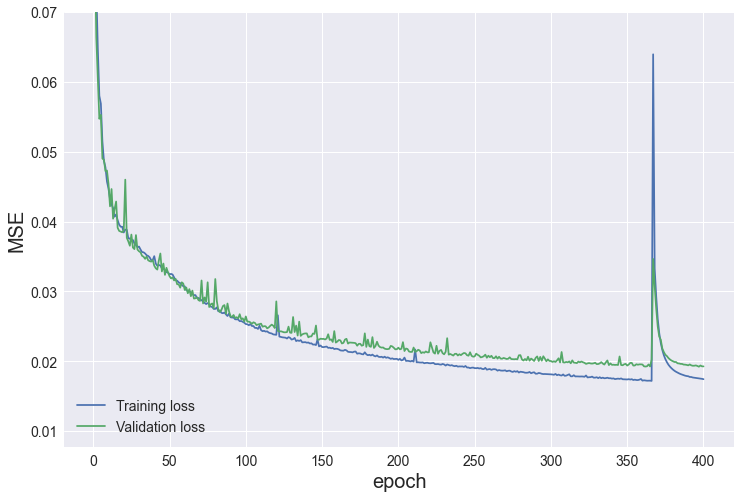

In [29]:
d=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/final/log_tensorflow.cfdg001.24645765.out',1)

In [24]:
d=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/WGAN/log_tensorflow.cfdg002.24755984.out',1)

ValueError: could not convert string to float: '0.29538, discriminator training loss'

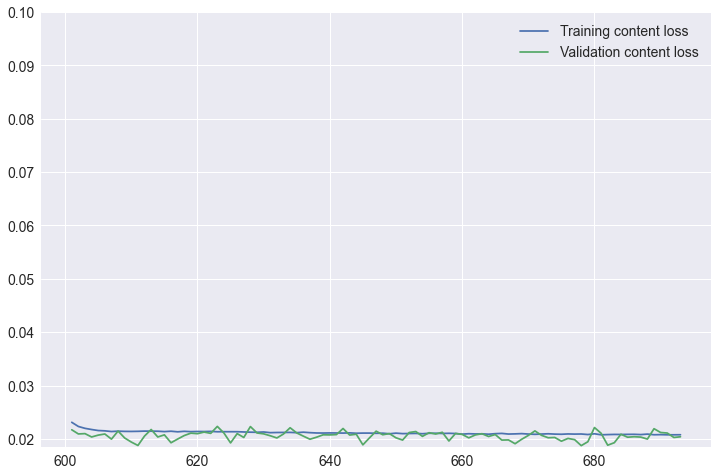

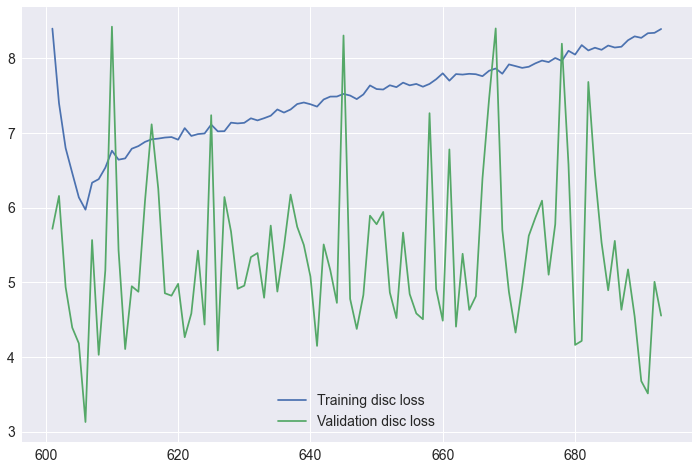

In [8]:
d=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/GB/log_tensorflow.cfdg002.24747883.out',0)

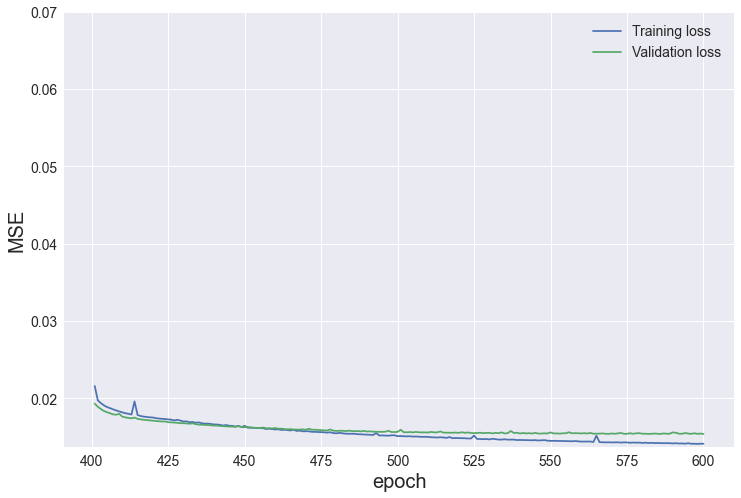

In [19]:
d=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/GB/log_tensorflow.cfdg002.24741254.out')

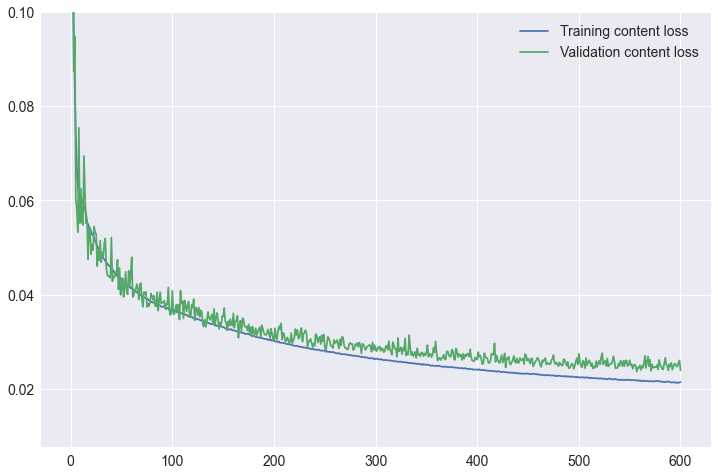

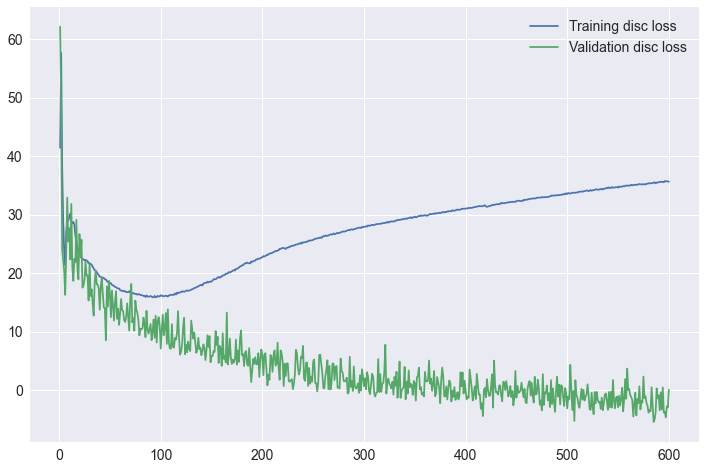

In [7]:
d=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/WGAN\\log_tensorflow.cfdg001.24730884.out',0)

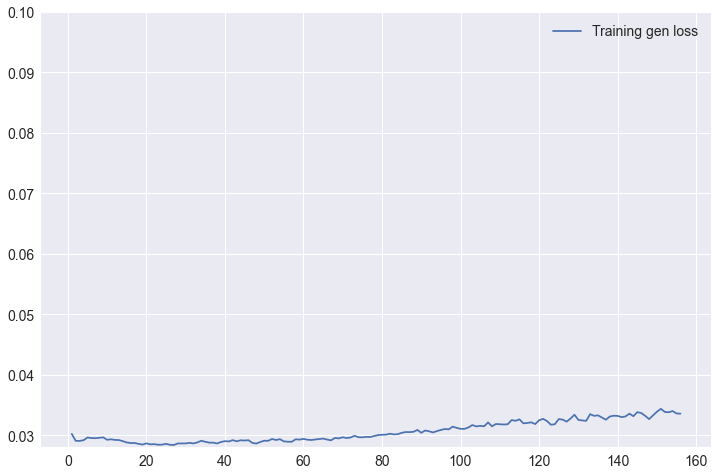

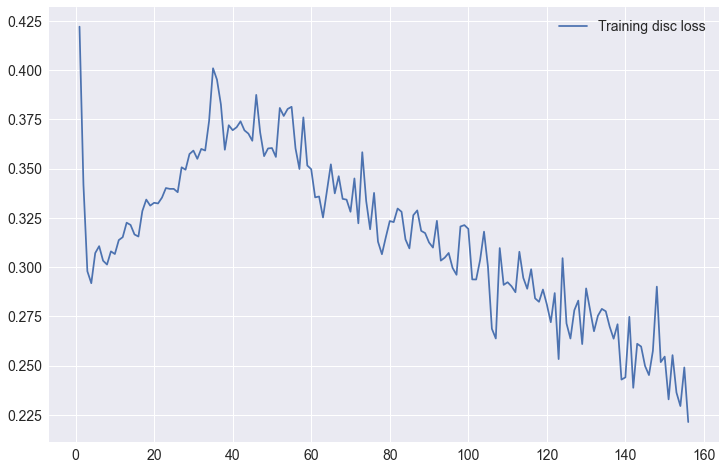

In [6]:
d=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/GAN\\log_tensorflow.cfdg003.24683656.out',0,0)

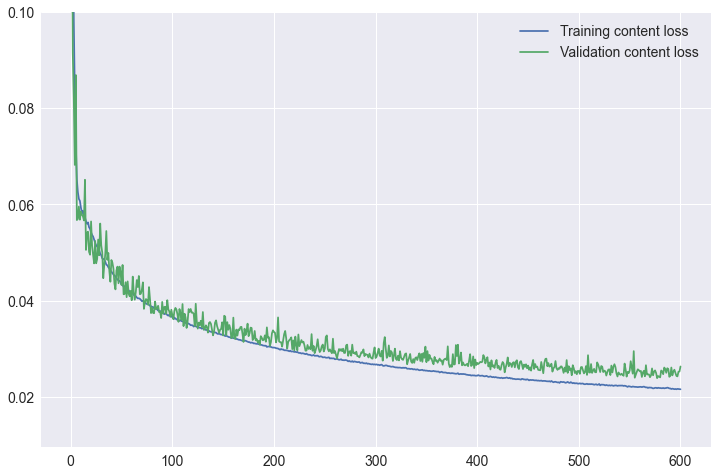

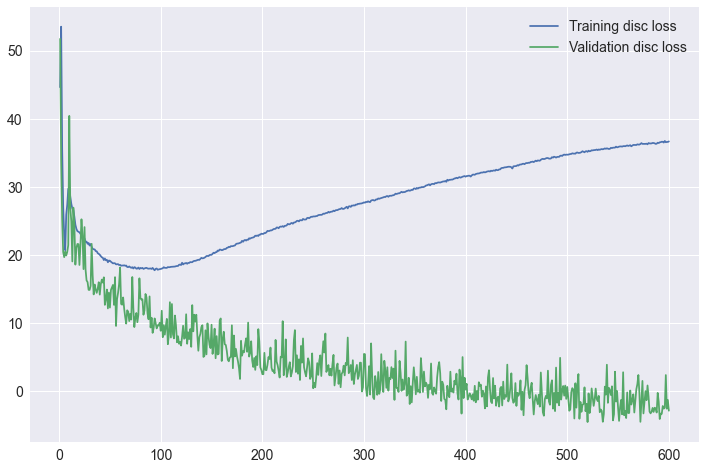

In [10]:
d=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/WGAN\\log_tensorflow.cfdg002.24698819.out',0)

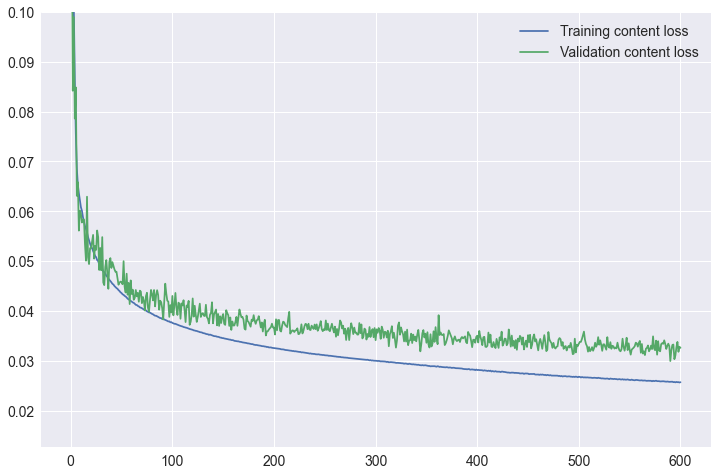

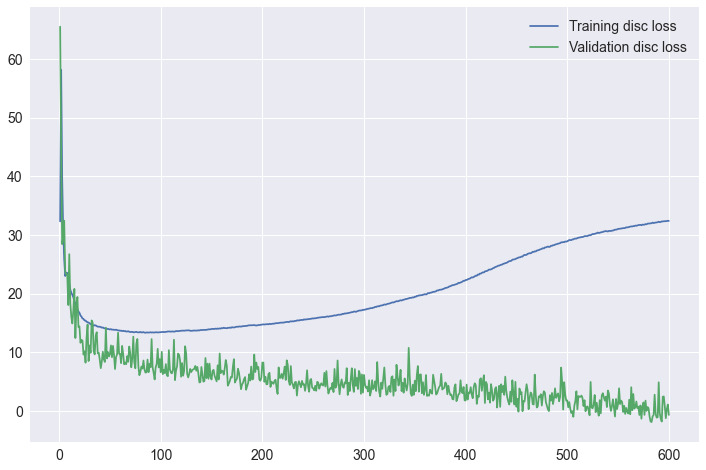

In [8]:
d=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/WGAN\\log_tensorflow.cfdg001.24695524.out',0)

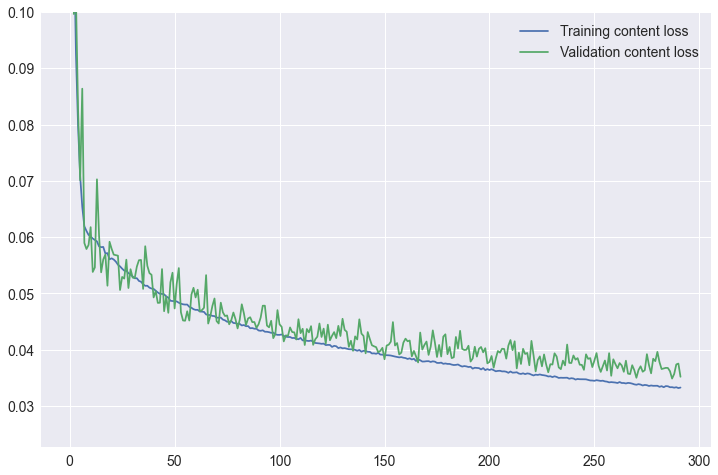

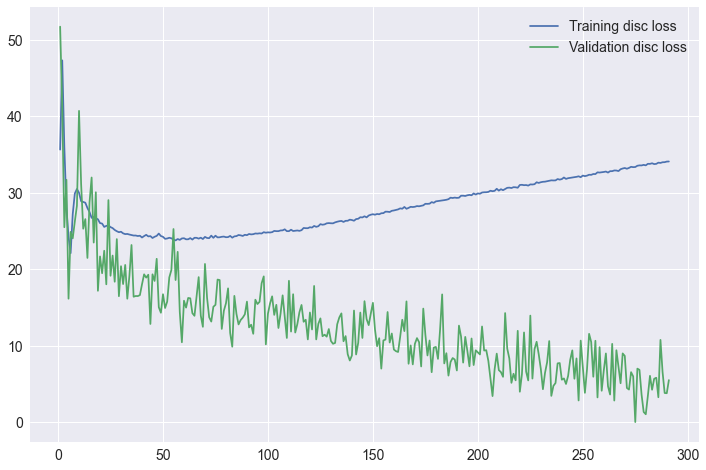

In [59]:
d=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/WGAN\\log_tensorflow.cfdg001.24655437.out',0)

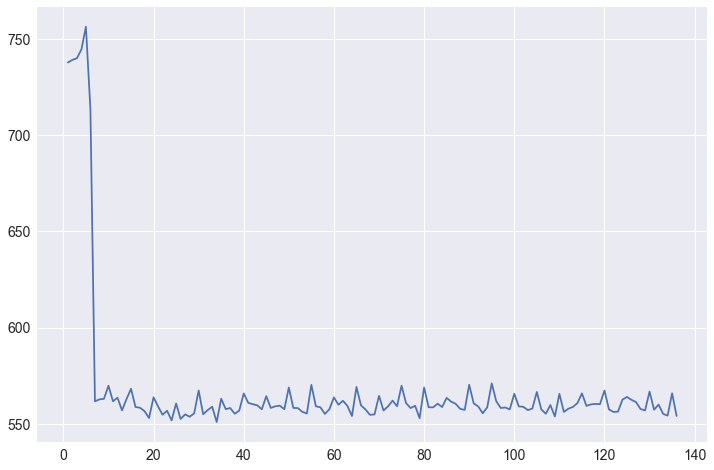

In [10]:
plt.plot(d["e"],d["epoch_time"])

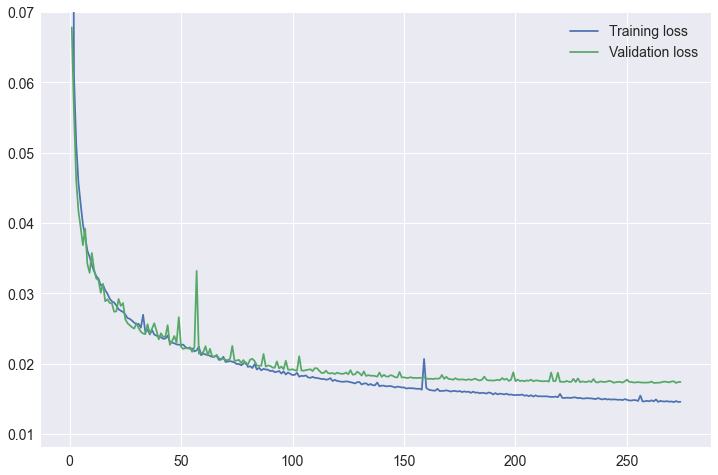

In [46]:
d=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/final\\log_tensorflow.cfdg002.24647834.out')

(1e-06, 0.0006275063821852584)

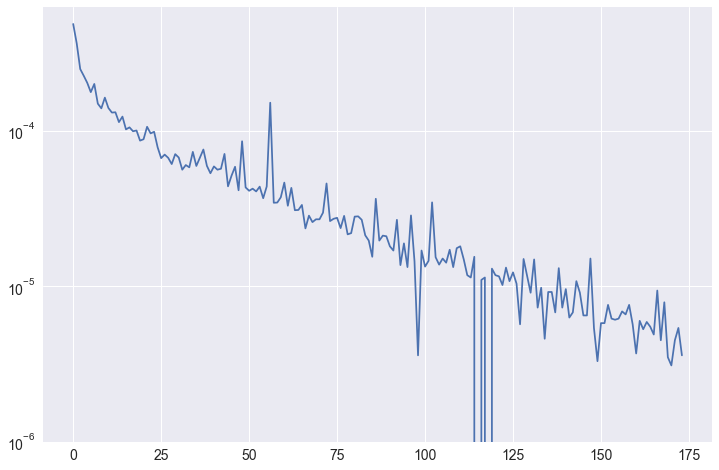

In [48]:
N=100
plt.plot(np.convolve(-np.diff(d["vl_e"]), np.ones(N)/N, mode='valid'))
plt.yscale("log")
plt.ylim(1e-6)

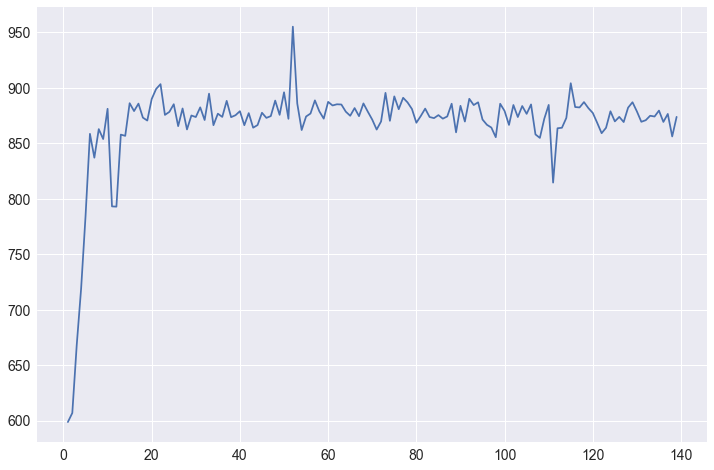

In [95]:
plt.plot(d["e"],d["epoch_time"])

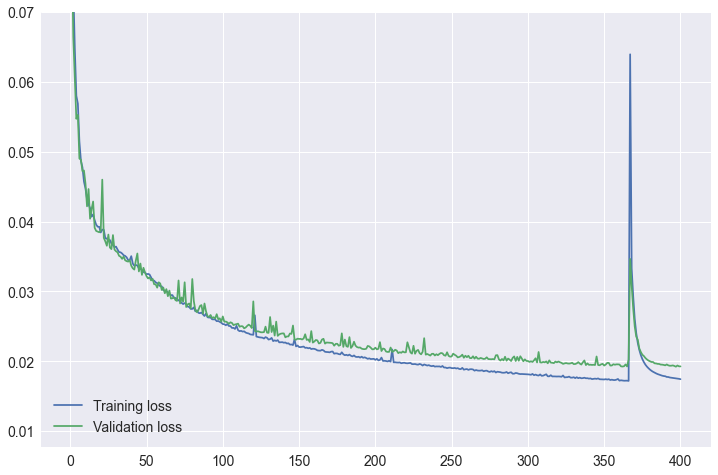

In [12]:
d=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/final\\log_tensorflow.cfdg001.24645765.out')

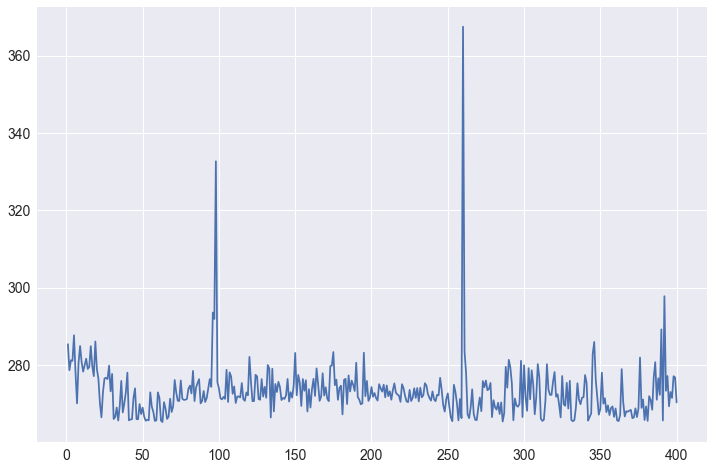

In [10]:
plt.plot(d["e"],d["epoch_time"])

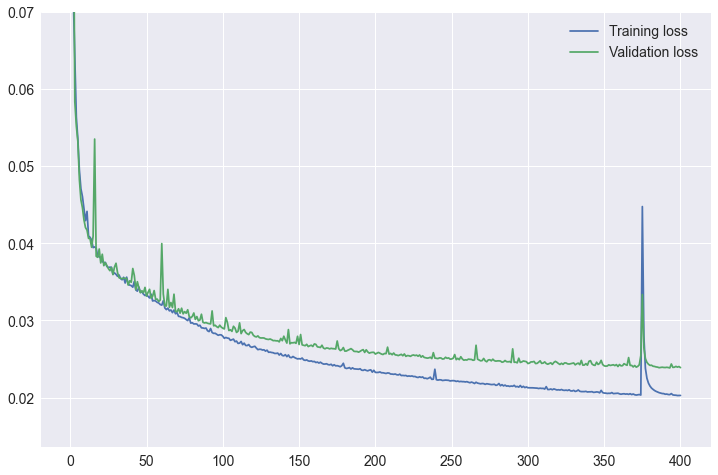

In [17]:
d=get_loss_from_log("//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/final\\log_tensorflow.cfdg003.24629762.out")

(1e-06, 0.03906802440937909)

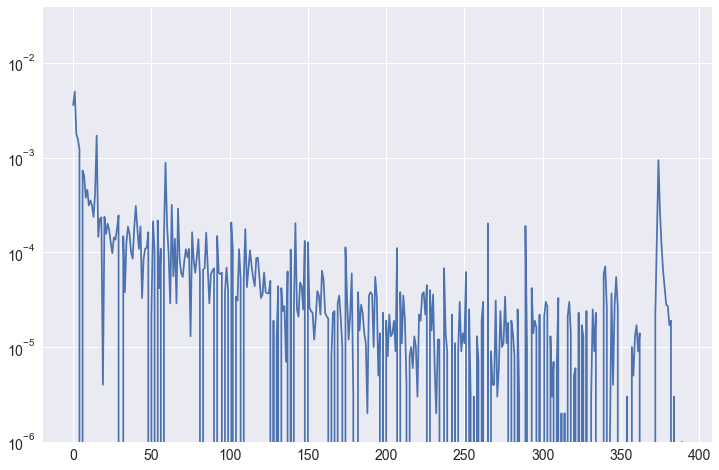

In [45]:
N=10
plt.plot(np.convolve(-np.diff(d["vl_e"]), np.ones(N)/N, mode='valid'))
plt.yscale("log")
plt.ylim(1e-6)

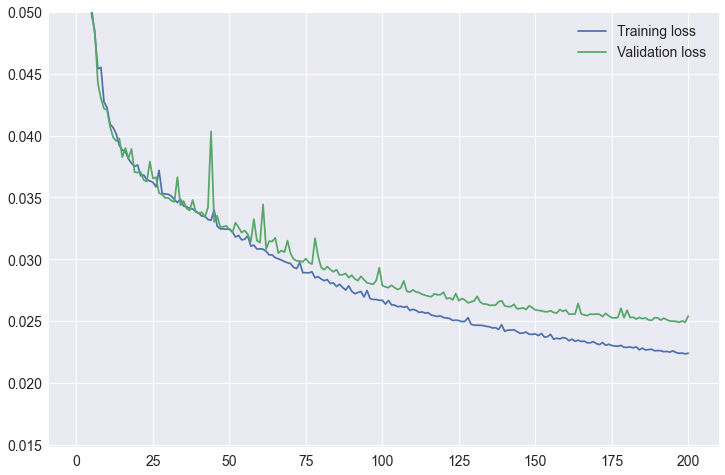

In [8]:
d=get_loss_from_log("//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/tf\\log_tensorflow.cfdg001.24608034.out")


### Ablation study

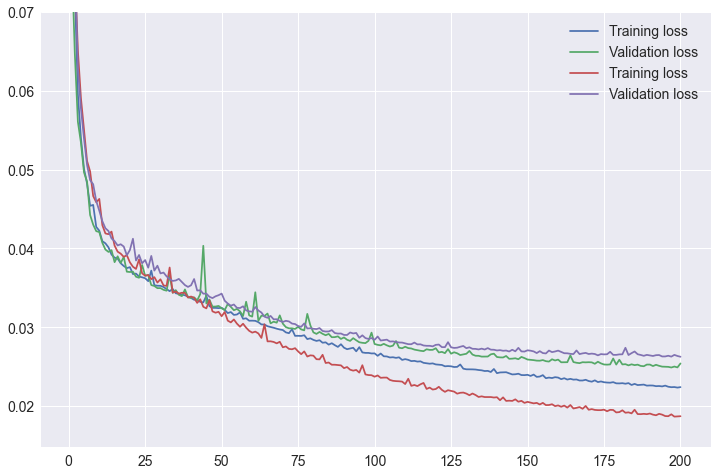

In [7]:
d=get_loss_from_log("//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/tf\\log_tensorflow.cfdg001.24608034.out")
d_cnn2=get_loss_from_log("//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/tf\\log_tensorflow.cfdg003.24609802.out")

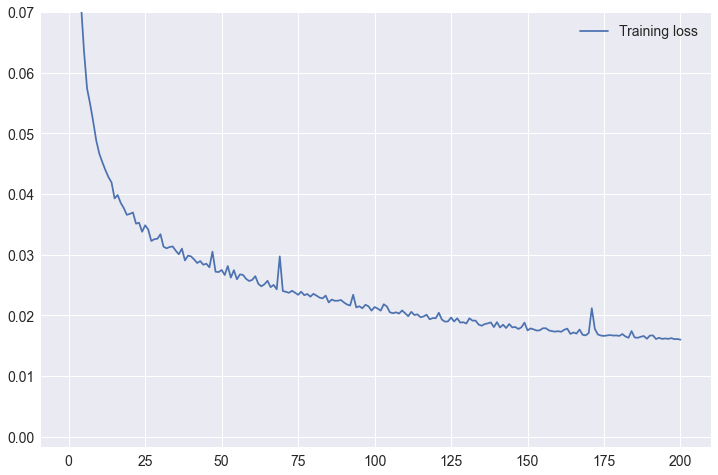

In [8]:
#fix offset to 3 to run
dd=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/tf\\log_tensorflow.cfdg002.24452722.out',line_off=3)

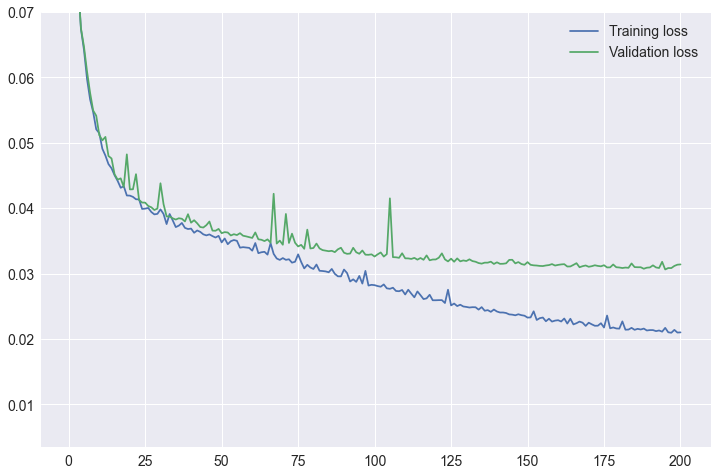

In [9]:
#fix offset to 3 to run
#d=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/tf\\log_tensorflow.cfdg002.24452722.out')
d=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/tf\\log_tensorflow.cfdg001.24466512.out')

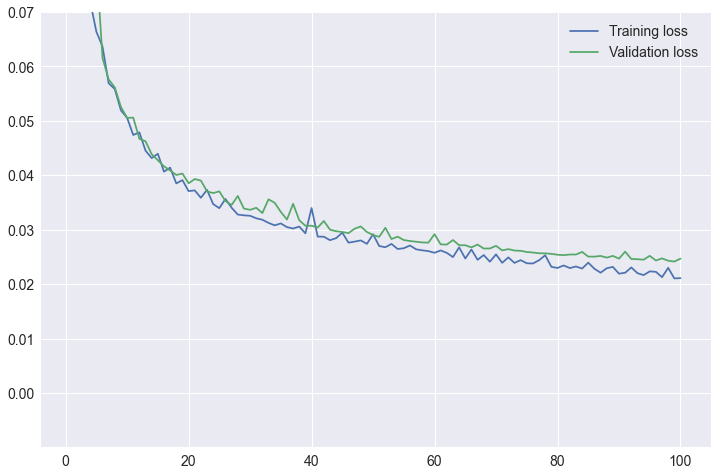

In [10]:
d2=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/tf\\log_tensorflow.cfdg002.24468217.out')

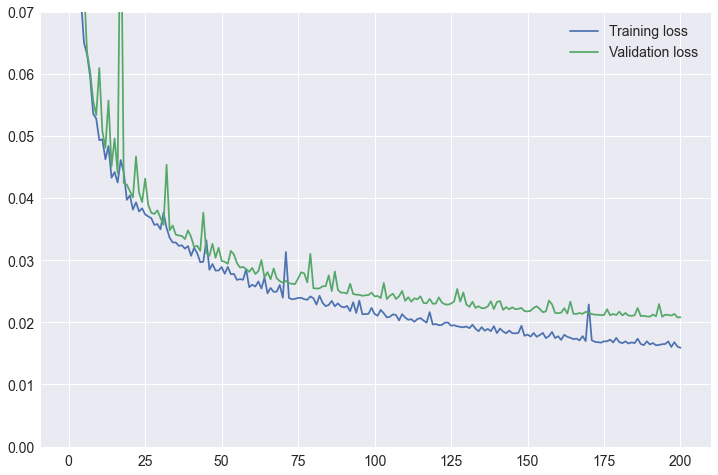

In [11]:
d4=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/tf\\log_tensorflow.cfdg003.24507094.out')

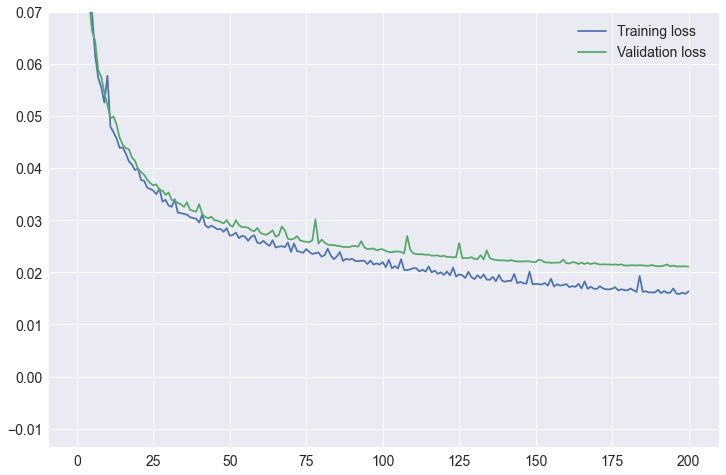

In [12]:
d3=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/tf\\log_tensorflow.cfdg001.24504000.out')

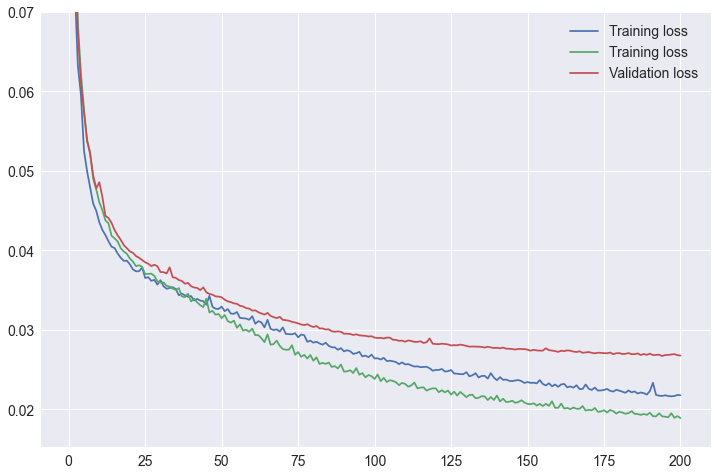

In [13]:
d_cnn0=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/tf\\log_tensorflow.cfdg002.24440363.out')
d_cnn1=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/tf\\log_tensorflow.cfdg001.24603113.out')#log_tensorflow.cfdg003.24440364.out')
#d_cnn2=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/thesis/logs/tf\\log_tensorflow.cfdg002.24594603.out')

In [16]:
import seaborn as sns 


In [17]:
palette=sns.color_palette(as_cmap=1)

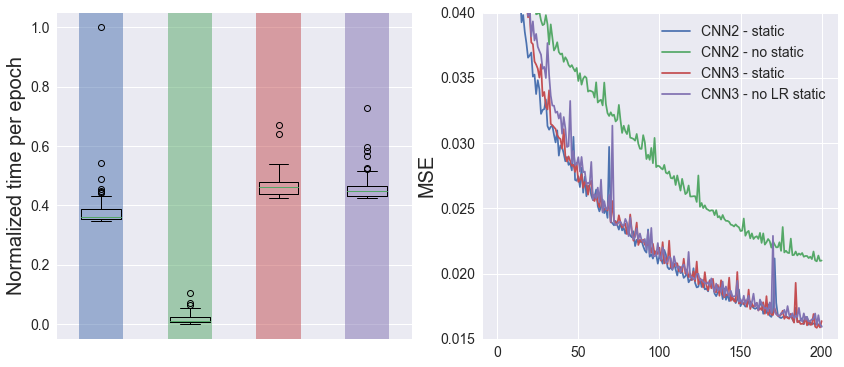

In [18]:
fig,(ax1, ax2)=plt.subplots(1,2,figsize=[14,6])
#plt.suptitle("",fontsize=16)

#ax1.plot(dd["e"],100*dd["tl_e"])
#ax1.plot(cnn_epoch_1,cnn_epoch_loss_1)
#ax1.set_xlabel("Epoch")
ax1.set_ylabel("Normalized time per epoch")
maxi=np.max(dd["epoch_time"])
mini=np.min(d["epoch_time"])
ax1.boxplot([(dd["epoch_time"]-mini)/(maxi-mini),
             (d["epoch_time"]-mini)/(maxi-mini),
             (d3["epoch_time"]-mini)/(maxi-mini),
             (d4["epoch_time"]-mini)/(maxi-mini)])
#ax1.plot(d["e"],d["vl_e"])
#ax1.plot(d3["e"],d3["vl_e"])
#ax1.plot(d4["e"],d4["vl_e"])
#ax1.plot(d["e"],d["cl_e"])
#ax1.set_ylim([0.015,0.04])
#ax1.set_title("Validation set")
for i in range(0,4):
    ax1.axvspan(i+1-0.25, i+1.25, facecolor=palette[i], alpha=0.5)
ax1.set_xticks([])
    
ax2.set_ylabel("MSE")
ax2.plot(dd["e"],dd["tl_e"],label="CNN2 - static")
ax2.plot(d["e"],d["tl_e"],label="CNN2 - no static")
ax2.plot(d3["e"],d3["tl_e"],label="CNN3 - static")
ax2.plot(d4["e"],d4["tl_e"],label="CNN3 - no LR static")
#ax2.set_title("Training set")
#ax2.plot(d["e"],d["cl_e"],label="WGAN (with static)")
ax2.set_ylim([0.015,0.04])
_=ax2.legend()

In [ ]:
(np.mean((d_cnn2['epoch_time']-mini)/(maxi-mini))-np.mean((d_cnn0['epoch_time']-mini)/(maxi-mini)))/np.mean((d_cnn0['epoch_time']-mini)/(maxi-mini))

In [53]:
(np.mean(d['epoch_time'])-np.mean(d_cnn0['epoch_time']))/np.mean(d_cnn0['epoch_time'])*100

71.36679468587236

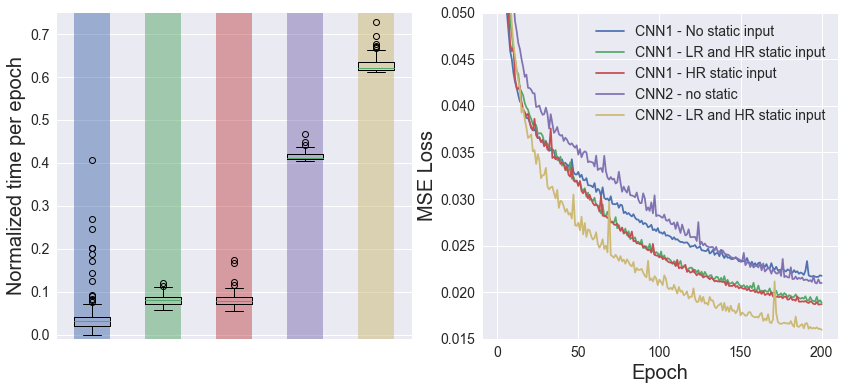

In [23]:
fig,(ax1, ax2)=plt.subplots(1,2,figsize=[14,6])
#fig,ax2=plt.subplots(1,1,figsize=[14,6])
#plt.suptitle("CNN (generator) pretraining",fontsize=16)

#ax1.plot(d_cnn0["e"],d_cnn0['epoch_time'])
#ax1.plot(cnn_epoch_1,cnn_epoch_loss_1)
#ax1.set_xlabel("Epoch")
ax1.set_ylabel("Normalized time per epoch")
maxi=np.max(dd['epoch_time'])
mini=np.min(d_cnn0["epoch_time"])
ax1.boxplot([(d_cnn0['epoch_time']-mini)/(maxi-mini),
             (d_cnn1['epoch_time']-mini)/(maxi-mini),
             (d_cnn2['epoch_time']-mini)/(maxi-mini),
             (d['epoch_time']-mini)/(maxi-mini),
             (dd['epoch_time']-mini)/(maxi-mini)])
#ax1.plot(dd["e"],dd['epoch_time'])
#ax1.plot(d["e"],d['epoch_time'])
for i in range(0,5):
    ax1.axvspan(i+1-0.25, i+1.25, facecolor=palette[i], alpha=0.5)
ax1.set_xticks([])

ax1.set_ylim([-0.01,0.75])

ax2.plot(d_cnn0["e"],d_cnn0["tl_e"],label="CNN1 - No static input")
#ax1.plot(cnn_epoch_1,cnn_epoch_loss_1)
ax2.set_xlabel("Epoch")
ax2.set_ylabel("MSE Loss")
ax2.plot(d_cnn1["e"],d_cnn1["tl_e"],label="CNN1 - LR and HR static input")
ax2.plot(d_cnn2["e"],d_cnn2["tl_e"],label="CNN1 - HR static input")
ax2.plot(d["e"],d["tl_e"],label="CNN2 - no static")
ax2.plot(dd["e"],dd["tl_e"],label="CNN2 - LR and HR static input")



ax2.set_ylim([0.015,0.05])
_=ax2.legend()

### old

In [5]:
d_gan=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/PhIRE/logs/tf\\log_tensorflow.trained_gan1_all.out',
                    cnn=0)


In [5]:
d_gan1=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/PhIRE/logs/tf\\log_tensorflow.cfdg001.24375986.out',
                    cnn=0)
d_gan2=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/PhIRE/logs/tf\\log_tensorflow.cfdg001.24376961.out',
                    cnn=0,epoch_limit=10)
d_gan3=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/PhIRE/logs/tf\\log_tensorflow.cfdg001.24398252.out',
                    cnn=0)
d_gan4=get_loss_from_log('//smb.hpc.uni-oldenburg.de/hpc_work/PhIRE/logs/tf\\log_tensorflow.cfdg001.24403382.out',
                    cnn=0)

d_gan["e"]=np.concatenate([d_gan1["e"],d_gan2["e"],d_gan3["e"],d_gan4["e"]])
d_gan["gl_e"]=np.concatenate([d_gan1["gl_e"],d_gan2["gl_e"],d_gan3["gl_e"],d_gan4["gl_e"]])#np.append(d_gan["gl_e"],d_gan2["gl_e"])
d_gan["dl_e"]=np.concatenate([d_gan1["dl_e"],d_gan2["dl_e"],d_gan3["dl_e"],d_gan4["dl_e"]])#np.append(d_gan["dl_e"],d_gan2["dl_e"])

Text(0.5, 1.0, 'Discriminator')

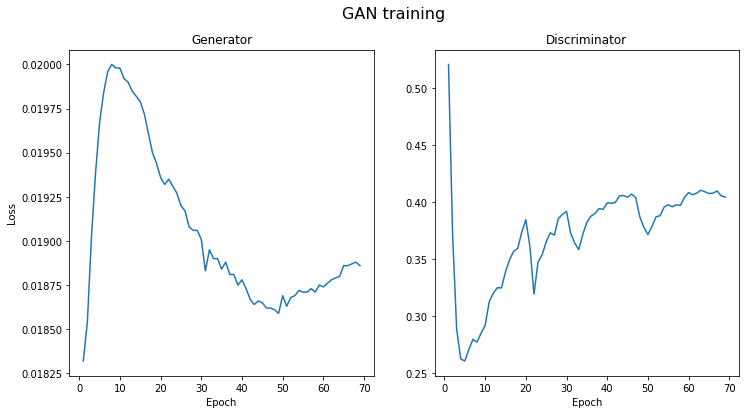

In [6]:
fig,(ax1, ax2)=plt.subplots(1,2,figsize=[12,6])
plt.suptitle("GAN training",fontsize=16)

ax1.plot(d_gan["e"],d_gan["gl_e"])
#ax1.plot(gan_e1,gl_e1)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("Generator")

ax2.plot(d_gan["e"],d_gan["dl_e"])
#ax2.plot(gan_e1,dl_e1)
ax2.set_xlabel("Epoch")
ax2.set_title("Discriminator")

In [24]:
d_cnn0=get_loss_from_log('//smb.uni-oldenburg.de/hpc_data/thesis/data/logs/tf\\log_tensorflow.cfdg002.24375990.out')
d_cnn1=get_loss_from_log('//smb.uni-oldenburg.de/hpc_data/thesis/data/logs/tf\\log_tensorflow.cfdg001.24375976.out')
d_cnn2=get_loss_from_log('//smb.uni-oldenburg.de/hpc_data/thesis/data/logs/tf\\log_tensorflow.cfdg001.24413017.out')

In [25]:
d=get_loss_from_log('//smb.uni-oldenburg.de/hpc_data/thesis/data/logs/tf\\log_tensorflow.cfdg002.24421397.out')

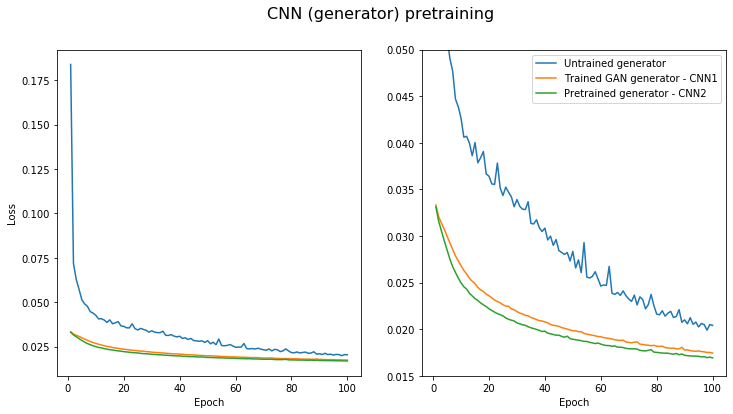

In [26]:
fig,(ax1, ax2)=plt.subplots(1,2,figsize=[12,6])
plt.suptitle("CNN (generator) pretraining",fontsize=16)

ax1.plot(d_cnn0["e"],d_cnn0["l_e"])
#ax1.plot(cnn_epoch_1,cnn_epoch_loss_1)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.plot(d_cnn1["e"],d_cnn1["l_e"])
ax1.plot(d_cnn2["e"],d_cnn2["l_e"])

ax2.plot(d_cnn0["e"],d_cnn0["l_e"],label="Untrained generator")
#ax1.plot(cnn_epoch_1,cnn_epoch_loss_1)
ax2.set_xlabel("Epoch")
#ax2.set_ylabel("Loss")
ax2.plot(d_cnn1["e"],d_cnn1["l_e"],label="Trained GAN generator - CNN1")
ax2.plot(d_cnn2["e"],d_cnn2["l_e"],label="Pretrained generator - CNN2")
ax2.set_ylim([0.015,0.05])
ax2.legend()

In [21]:
d_cnn2["e"]=np.concatenate([d_cnn2["e"],d["e"]])
d_cnn2["l_e"]=np.concatenate([d_cnn2["l_e"],d["l_e"]])

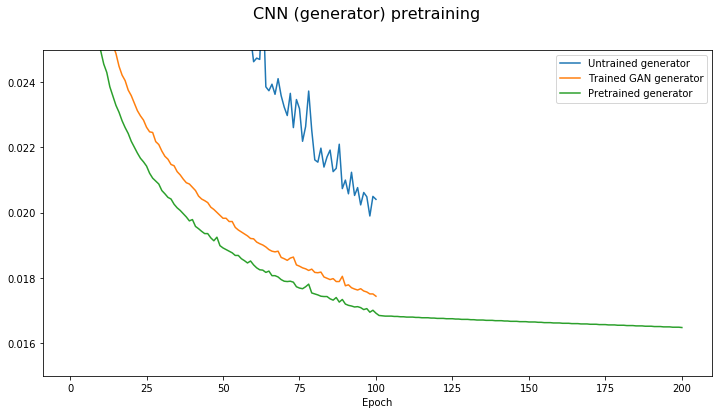

In [23]:
fig,ax2=plt.subplots(1,1,figsize=[12,6])
plt.suptitle("CNN (generator) pretraining",fontsize=16)


ax2.plot(d_cnn0["e"],d_cnn0["l_e"],label="Untrained generator")
#ax1.plot(cnn_epoch_1,cnn_epoch_loss_1)
ax2.set_xlabel("Epoch")
#ax2.set_ylabel("Loss")
ax2.plot(d_cnn1["e"],d_cnn1["l_e"],label="Trained GAN generator")
ax2.plot(d_cnn2["e"],d_cnn2["l_e"],label="Pretrained generator")
ax2.set_ylim([0.015,0.025])
ax2.legend()

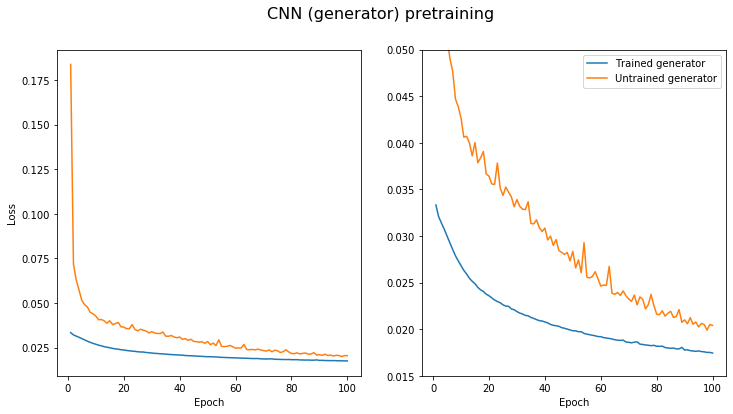

In [10]:
fig,(ax1, ax2)=plt.subplots(1,2,figsize=[12,6])
plt.suptitle("CNN (generator) pretraining",fontsize=16)

ax1.plot(d_cnn["pre_e"],d_cnn["l_e"])
#ax1.plot(cnn_epoch_1,cnn_epoch_loss_1)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.plot(d_cnn0["pre_e"],d_cnn0["l_e"])

ax2.plot(d_cnn["pre_e"],d_cnn["l_e"],label="Trained generator")
#ax1.plot(cnn_epoch_1,cnn_epoch_loss_1)
ax2.set_xlabel("Epoch")
#ax2.set_ylabel("Loss")
ax2.plot(d_cnn0["pre_e"],d_cnn0["l_e"],label="Untrained generator")
ax2.set_ylim([0.015,0.05])
ax2.legend()


Text(0.5, 0, 'number of iterations')

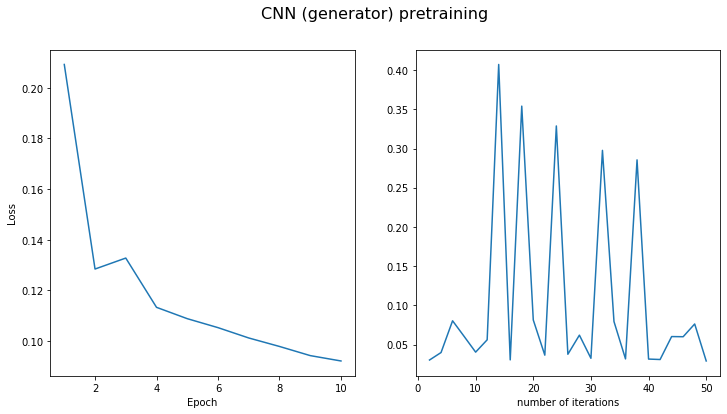

In [34]:
fig,(ax1, ax2)=plt.subplots(1,2,figsize=[12,6])
plt.suptitle("CNN (generator) pretraining",fontsize=16)

ax1.plot(d["pre_e"],d["l_e"])
#ax1.plot(cnn_epoch_1,cnn_epoch_loss_1)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")

ax2.plot(d["pre_i"],d["l_i"])
#ax2.plot(cnn_iter_1,cnn_iter_loss_1)
ax2.set_xlabel("number of iterations")

Text(0.5, 1.0, 'Discriminator')

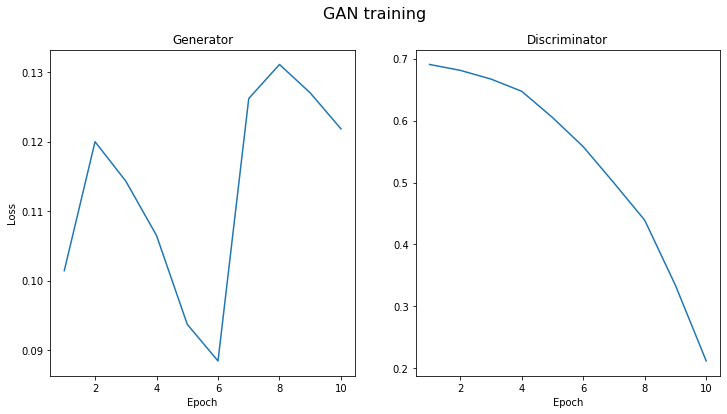

In [36]:
fig,(ax1, ax2)=plt.subplots(1,2,figsize=[12,6])
plt.suptitle("GAN training",fontsize=16)

ax1.plot(d["e"],d["gl_e"])
#ax1.plot(gan_e1,gl_e1)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("Generator")

ax2.plot(d["e"],d["dl_e"])
#ax2.plot(gan_e1,dl_e1)
ax2.set_xlabel("Epoch")
ax2.set_title("Discriminator")

In [151]:
cnn_epoch_0,cnn_epoch_loss_0,cnn_iter_0,cnn_iter_loss_0=get_loss_from_log(files[1])
cnn_epoch_1,cnn_epoch_loss_1,cnn_iter_1,cnn_iter_loss_1=get_loss_from_log("models/wind-20220303-132633/Pretraining_log.txt")

In [152]:
gan_e0,gl_e0,dl_e0=get_gan_loss_from_loss(files[0])
gan_e1,gl_e1,dl_e1=get_gan_loss_from_loss("models/wind-20220303-132633/GAN_training_log.txt")

Text(0.5, 0, 'number of iterations')

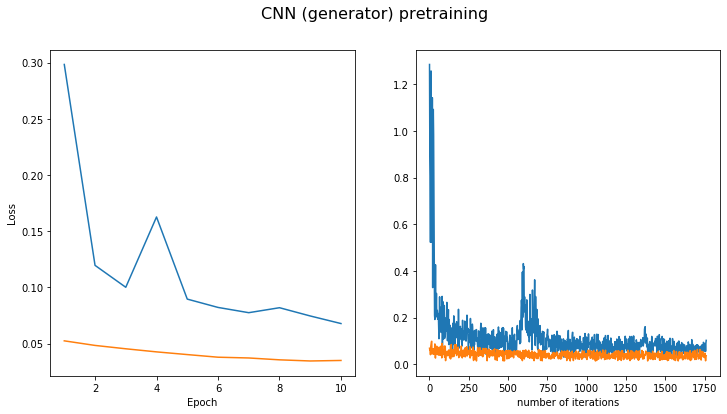

In [119]:
fig,(ax1, ax2)=plt.subplots(1,2,figsize=[12,6])
plt.suptitle("CNN (generator) pretraining",fontsize=16)

ax1.plot(cnn_epoch_0,cnn_epoch_loss_0)
ax1.plot(cnn_epoch_1,cnn_epoch_loss_1)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")

ax2.plot(cnn_iter_0,cnn_iter_loss_0)
ax2.plot(cnn_iter_1,cnn_iter_loss_1)
ax2.set_xlabel("number of iterations")

Text(0.5, 1.0, 'Discriminator')

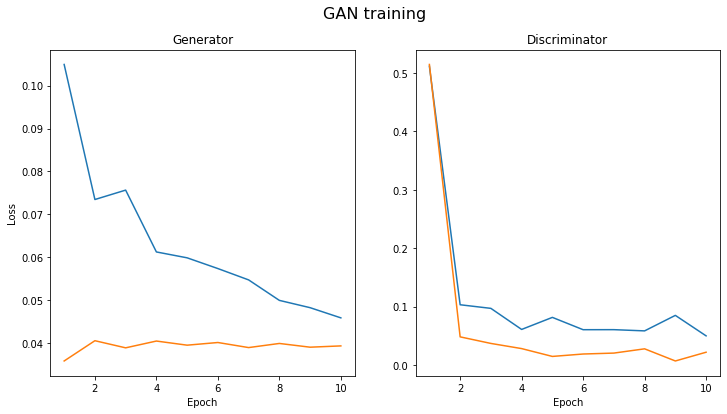

In [165]:
fig,(ax1, ax2)=plt.subplots(1,2,figsize=[12,6])
plt.suptitle("GAN training",fontsize=16)

ax1.plot(gan_e0,gl_e0)
ax1.plot(gan_e1,gl_e1)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("Generator")

ax2.plot(gan_e0,dl_e0)
ax2.plot(gan_e1,dl_e1)
ax2.set_xlabel("Epoch")
ax2.set_title("Discriminator")

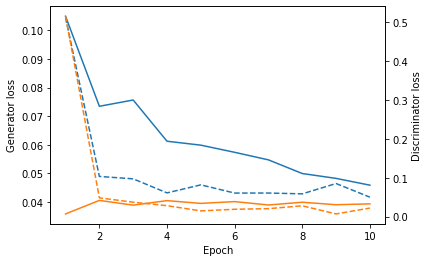

In [160]:
fig, ax1 = plt.subplots()

#color = 'tab:red'
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Generator loss")
ax1.plot(gan_e0,gl_e0)
ax1.plot(gan_e1,gl_e1)
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Discriminator loss')  # we already handled the x-label with ax1
ax2.plot(gan_e0,dl_e0,"--")
ax2.plot(gan_e1,dl_e1,"--")
#ax2.tick_params(axis='y', labelcolor=color)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()